<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch04_gradient_quadratic_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

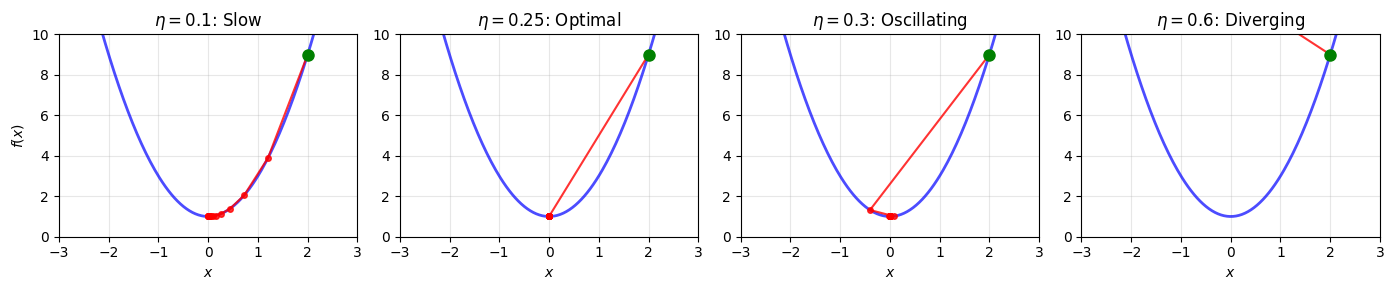

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent_1d_demo():
    """Visualize GD behavior for different step sizes."""
    f = lambda x: 2*x**2 + 1
    grad_f = lambda x: 4*x
    x0 = 2.0

    fig, axes = plt.subplots(1, 4, figsize=(14, 3))
    step_sizes = [0.1, 0.25, 0.3, 0.6]
    titles = [r'$\eta=0.1$: Slow', r'$\eta=0.25$: Optimal', r'$\eta=0.3$: Oscillating', r'$\eta=0.6$: Diverging']

    x_plot = np.linspace(-3, 3, 200)

    for ax, eta, title in zip(axes, step_sizes, titles):
        # Plot function
        ax.plot(x_plot, f(x_plot), 'b-', linewidth=2, alpha=0.7)

        # Run GD
        x = x0
        trajectory = [(x, f(x))]
        for _ in range(15):
            x_new = x - eta * grad_f(x)
            trajectory.append((x_new, f(x_new)))
            if abs(x_new) > 5:
              break
            x = x_new

        # Plot trajectory
        traj = np.array(trajectory)
        ax.plot(traj[:, 0], traj[:, 1], 'ro-', markersize=4, alpha=0.8)
        ax.plot(x0, f(x0), 'go', markersize=8, label='Start')

        ax.set_xlim(-3, 3)
        ax.set_ylim(0, 10)
        ax.set_xlabel('$x$')
        ax.set_title(title)
        ax.grid(True, alpha=0.3)

    axes[0].set_ylabel('$f(x)$')
    plt.tight_layout()
    plt.savefig('gd_step_sizes.pdf', bbox_inches='tight')
    plt.show()

gradient_descent_1d_demo()